<div class="alert alert-block alert-danger" style="color:black"><h2>THIS WORKBOOK IS ASSESSED</h2>
    Each activity details how many marks it is worth (out of 100), and how marks are awarded.<br>
    When you are satisfied that you have completed the activities as required you should:</p>
    <ol>
        <li>Use the jupyterlab functions to download your work (ask your tutor if you need help with this) and save it somewhere sensible so you can find it easily.</li>
        <li>Submit them for automatic marking and feedback by following the links in the <i>Assessments</i> folder on Blackboard.</li>
        <ul>
        <li>This may involve answering some multiple choices questions as well as submitting your code.</li>
        <li><b>Access the feedback provided</b> and use it to improve your work.</li>
        <li>You can have up to <em>four</em> attempts at submitting your work.</li>
    </ol>
<h3> Important instructions about formatting your code cells</h3>
Where you are asked to insert code, or to complete a code skeleton, <b>you must not put any other characters before or after your code.</b>
 <ul>
        <li> Otherwise the marking server will not be able to parse and accept them</li>
        <li> In other words, the first line of the cells containing your code should start with the <i>def</i> or <i>class</i> keywords and all other lines should be appropriately indented</li>
    </ul>
</div>

# Workbook 8: Multi-layer Perceptrons (Neural Networks)

Overview of activities and objectives of this workbook:

1. The first part of this workbook will provide hands-on experience of how Perceptrons can be combined into Neural Networks/Multi-layer perceptrons to learn complex models.
    - We will look at the key differences between the two algorithms, such as:
        - Non-linear activation functions.
        - Using Backpropagation to update (learn) the weights.
        - How different nodes learn different aspects of the problem.
    - We will also consider how network architecture and training parameters affects the outcome. And understand the difference between:
        - **hyper-parameters** - for example network architectures and learning parameters, that can have significant impact on the ability to learn a good model from a data set.
        - **hyper-parameter tuning** to allow fair comparisons between different Machine Learning algorithms.


2. The second part of this workbook we will implement a simple Machine Learning workflow - sometimes called a *pipeline* - to let us do fair, systematic and **automated** comparisons between algorithms.
    - We will configure an MLP with more than one output node when there are more than two different output labels (multi-class learning), such as the Iris dataset.

3. The third part of this workbook will apply MLP to the image classification task MNIST, for recognising hand-written digits.

<div style="background-color:black;width:100%;"></div>

# Part 1: Artificial Neural Networks
<img src="figures/ANN-2-Node.png" style="float:right" width= 500>

As we have seen, Perceptrons are only capable of solving linearly separable problems.   
To overcome this limitation, we can connect Perceptrons together into a network.  
Each one becomes a Node in the network, and they are connected together into layers. 

In standard Artificial Neural Network (ANN) architecture there is one input, one or more hidden layers, and one or more nodes in the output layer.  
  - Though the term *input layer* is a bit misleading, it doesn't actually do any computation, it is just the inputs to the network.
  - So, outputs of hidden layers become the inputs to subsequent hidden layers, or the final output layer. 
  - Hidden nodes tend to learn different aspects of the problem space, building more complex decision boundaries and are therefore able to solve more complex problems.

Note: 
- The number of nodes in the input layer must equal the number of inputs/features in the data. 
- One output node can discriminate between two classes (classification problems),
  or predict a value for one continuous variable (regression problems).
  If your data  has more than two classes (or variables to predict),
  the number of output nodes must equal the number of classes/regression variables. 
- The number of hidden layers and nodes in the layers is arbitrary, and selecting this architecture is part of building an ANN.

### Neural Network Training Algorithm  
Similar to Perceptrons, ANN are trained in two 'phases'.
- The forward pass, where data is input into the network to produce an output. 
- The backward pass, where the error in output is used to update the weights using Backpropagation and Gradient Descent.
  - note that to calculate what the sum of  inputs was going *in* to a node we apply the *sigmoid derivative* to the signal coming *out* of that node 

<img src="figures/ann-pseudocode.png" style="float:center">

### Solving XOR
As an introduction to the ANN algorithm, and to give you an intuition for how different nodes and layers in the network learn different aspects of the problem space, we are going to look at how a small network can solve the XOR problem.

Running the code will train an ANN to solve the XOR problem and produces a visualisation to show how different nodes have learned different aspects of the problem to create a more complex decision boundary (in this case different logical functions).

- You do not need to understand *how* the graphs/visualisations are produced.

- You should try and understand *what* the graphs/visualisations output means.


**The first cell below** import the libraries and define the function that plots the decision surface.
    - If the first cell reports an error trying to import VisualiseNN, make sure you have downloaded the file VisualiseNN.py and it is in the same directory as this notebook

**The second cell below** creates a dataset for the XOR problem, then trains an MLP to solve it and displays the results.

It will try and learn the XOR problem and show you a plot of how the error rate changes over *time* measured in epochs.

As there are only four cases, we do not have any test data for this problem - we are just looking at how reliably different sized networks can learn a simple problem.
<ul>
    <li> One epoch means that all the training data is shown to the system once and the weights are updated.</li>
    <li> We know that <i>in theory</i> it should be able to learn XOR with 2 hidden nodes.<br>
         But is there a difference between theory and what happens in practice? </li>
    <li>Each time you run the cell it starts the whole process from a new set of random weights, so the error curve will be different and you might get different final accuracy scores.</li>
    <li> Remember that Stochastic Gradient Descent is a form of local search - so what you are seeing here is the effect of the starting position!</li>
</ul>

Experiment with a few other values for the size of the hidden layer, doing a few runs for each to see what impact that has on whether  the network reliably learns a function that computes XOR.


In [ ]:
# basics for manipulating and outputting arrays etc
import matplotlib.pyplot as plt
import numpy as np

## MLP specific stuff
from sklearn.neural_network import MLPClassifier
import VisualiseNN as VisNN

# useful sklearn functions for preprocessing data and showing results
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import OneHotEncoder
# the iris data
from sklearn.datasets import load_iris
%matplotlib inline

Training set accuracy: 75.0% after 73 iterations


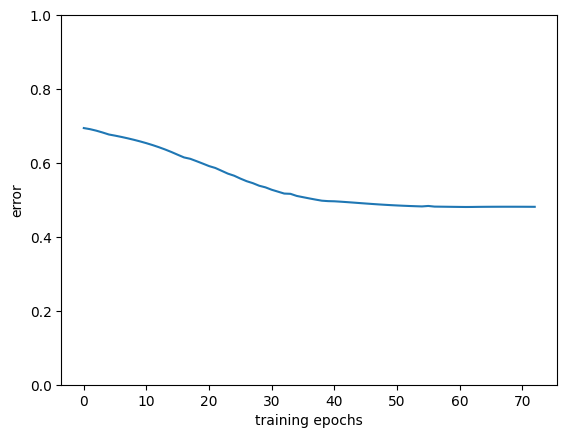

In [ ]:
# This cell fits an MLP to the XOR problem once for a given network architecture 
# The code illustrates how to measure accuracy and make a plot

# Step 1: Define the data set - in this case XOR with two inputs
train_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_y = np.array([0, 1, 1, 0])
train_y = xor_y

# Step 2 define the size of the hidden layer- at present just do one run with three nodes in the hidden layer
num_hidden_nodes = 3

# Step 3 Create Multi-Layer Perceptron with one hidden layer of num_hidden_nodes neurons with logistic activation
# and Stochastic Gradient Descent (backprop)
xorMLP = MLPClassifier(
    hidden_layer_sizes=(num_hidden_nodes,),
    max_iter=1000,
    alpha=1e-4,
    solver="sgd",
    #verbose=0,
    learning_rate_init=0.1,
    #random_state=None
)

# Step 4: fit the model  it to the data
xorMLP.fit(train_X, train_y)

# Step 5 measure and print the accuracy
# this also shows you how to access the point at which training stopped
training_accuracy = 100 * xorMLP.score(train_X, train_y)
print(f"Training set accuracy: {training_accuracy}% after {xorMLP.n_iter_} iterations")

# Step 6 produce a plot of training loss (error) vs number of epochs
fig, ax= plt.subplots(nrows=1, ncols=1)
ax.plot(xorMLP.loss_curve_)
ax.set_ylim((0.0, 1.0))
ax.set_xlabel("training epochs")
ax.set_ylabel("error")
plt.show()

<div class="alert alert-block alert-info" style="color:black"><h2>Activity 1: Creating a reliability plot function</h2>
    <h3><b>20 marks</b> - using the marking scheme below</h3>
    <ul>
        <li>0 marks if the code cell with the function <code>make_reliability_plot()</code> contains any text outside the function body.</li>
        <li>0 marks if your code does not return the fig and axes objects as required.</li> 
        <li>10 marks for producing a matplotlib figure containing two matplotlib ax objects with titles and labels as specified below. And returning the objects (i.e. a figure and an array of axes).</li>
        <li>5 marks each if the contents of the plots match the <i>reference version</i>. This means you <b>must</b> set the <i>random_state</i> hyperparameter for each run as described below.</li>
    </ul>
    We use the term <b>capacity</b> to describe the ability of a model to learn complicated decision boundaries.<br>
    Another way of thinking about it is the model's <b>complexity</b> - the more complex a model, the greater its capacity to learn complicated things.<br>
    For a multi-layer perceptron this is largely detyermined  by the number of hidden layers and the <i>width</i> of each - how many nodes they contain. This activity investigates this effect for the trivial xor problem, later you will try it for other datasets.<br><br>
    Complete the function <code>make_xor_reliability_plot()</code> in the cell below to <i>automate</i> the process of investigating the effect of the model <i>capacity</i> (as controlled by <code>hidden_layer_sizes</code> hyper-parameter) for an MLP with a single layer of hidden nodes on:
    <ul>
        <li>The <i>reliability</i> - as measured by the <i>success rate</i> i.e. the proportion of runs that achieve 100% training accuracy.</li>
        <li>The <i>efficiency</i> - the mean number of training epochs per successful run.<br>
    Note that to avoid <i>divide-by-zero</i> problems you should check if no runs are successful for a given value and report a value of 1000 in that case.</li>
    </ul>
    <b>Contents of plots:</b>
    <ul>
        <li>You must return two objects <i>fig</i> and <i>axs</i> produced by a call to <code>plt.subplots(1,2 )</code>. Axes should be an array of axes with shape (1,2).</li>
        <li>The left hand plot should have a title "Reliability", y-axis label "Success Rate" and x-axis label "Hidden Layer Width".</li>
        <li>The right hand plot should have a title "Efficiency", y-axis label "Mean epochs" and x-axis label "Hidden Layer Width".</li>
        <li>In both cases the width (number of neurons) of the single hidden layer should cover the range [1, 10] (inclusive) in steps of 1.</li>
        <li>Each plot should contain an appropriate line illustrating the results of the experiment.</li> 
    </ul>
    <b>How to get started:</b>
    In several of the stages below you will be adapting code from the cell above, where we demonstrated how to train an MLP to solve XOR, and 'steps' refer to comments and code snippets in that code cell.</p>
    <ol>
        <li> Declare a list <code>hidden_layer_width</code> holding the values 1 to 10 (inclusive) defining the model size.</li>
        <li> Declare a 1-D numpy array filled with zeros called <code>successes</code> to hold the number of successful runs for the different model sizes.</li>
        <li> Declare a 2-D numpy array filled with zeros of shape (10, 10) called <code>epochs</code>.</li>
        <li> Create two nested loops: one over all the values for a variable <code>h_nodes</code> from the list <code>hidden_layer_width</code>, and the other for a variable <code>repetition</code> between 0 and 9 (i.e. doing 10 repetitions).</li>
        <li>Inside those loops:
            <ol>
                <li>Copy and edit code from  step 3 (above)) to create an MLP with one hidden layer containing the <code>h_nodes</code> nodes. <b>Note:</b> in the call to the MLP constructor you set the parameter <code>random_state</code> to be the run index so the results are the same as mine.</li>
                <li>Copy and edit code from step 4 to <i>fit</i> the model to the training data.</li>
                <li>Copy and edit code from Step 5 to measure it's accuracy</li>
                <li> If the accuracy is 100%:
                    <ul>
                        <li><i>Increment</i> the count in the successes array, i.e. <code>successes[h_nodes] += 1</code>.</li>
                        <li>Store the number of epochs taken in the epochs array, i.e. <code>epochs[h_nodes][repetition] = xorMLP.n_iter_</code>.</li>
                </ul>
            </ol>
        <li> Create a new array with one entry for each number of hidden nodes tested, that contains either:
            <ul>
                <li> 1000 if no runs got 100% accuracy for that network size.</li>
                <li> The mean number of epochs taken per successful run for that network size.</li>
            </ul>
        <li>Copy and edit the code from step 6 to make a figure containing two plots side-by-side as described in the task definition, set appropriate axis labels and title labels, and return the fig and axs objects.</li>
    </ol>
</div>

In [ ]:
def make_xor_reliability_plot(train_x, train_y):
    """ Insert code below to  complete this cell according to the instructions in the activity descriptor.
    Finally it should return the fig and axs objects of the plots created.

    Parameters:
    -----------
    train_x: numpy.ndarray
        feature values

    train_y: numpy array
        labels
    """
    
    # ====> insert your code below here

    fig, ax = None, None # You will need to change the definition of fig and ax e.g. fig, ax = plt.subplots()"
    raise NotImplementedError("Complete the function")
    
    # <==== insert your code above here

    return fig, ax

In [ ]:
# Use this to test your code
make_xor_reliability_plot(train_X, train_y)

## Visualising what the network is doing</h2>
The cell below shows an example MLP with 4 hidden layer nodes being created and fitted to the xor problem follow by some simple visualisations.
The top plot shows the output of the final node for different inputs.
    - In this case we only have the four inputs marked by circles.
    - In use, we would apply a threshold of 0.5 to decide whether the output of the network was 1 or 0, so the red/blue lines represent the decision boundaries.
    
The bottom plot shows a visualisation of the network structure and weights: 
<ul>
    <li>The line thickness represents the magnitude of the weight</li>
    <li> The line colour indicates the sign of the weight:<br>
           Blue lines are <b>negative weights</b>, so signals down these connections will  suppress the output of the cell they lead to.<br>
           Red lines are <b> positive weights</b>- so signals down these connections will  stimulate the node they lead to.</li>
</ul>

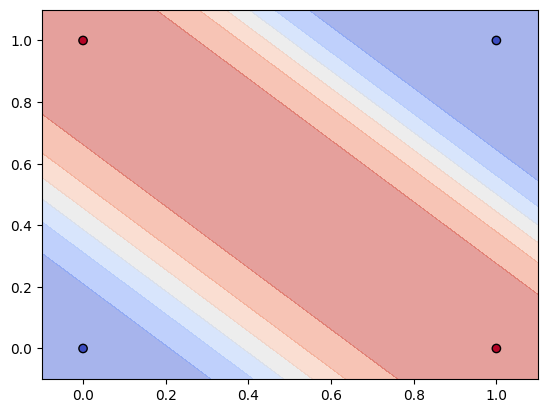

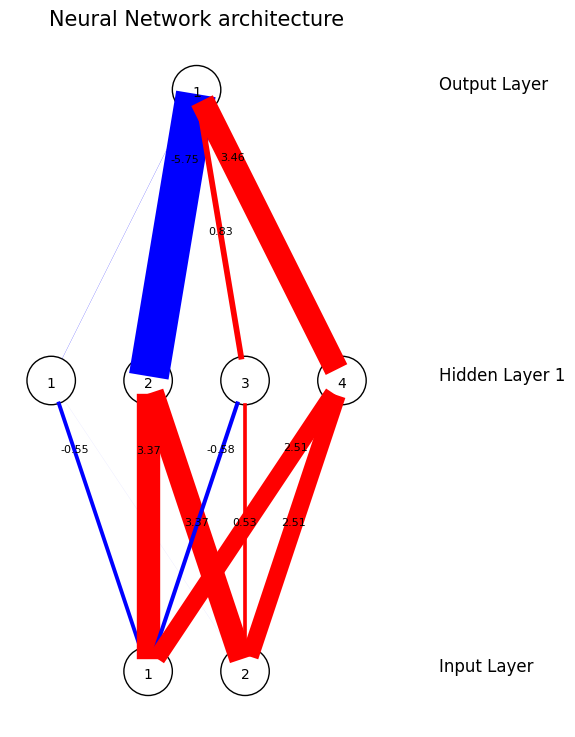

In [8]:
# Create an MLP with 4 hidden nodes
xorMLP= MLPClassifier(
    hidden_layer_sizes=(4,), max_iter=1000,
    alpha=1e-4, solver="sgd",
    learning_rate_init=0.1, random_state=5
)

# Fit the model to the data
xorMLP.fit(train_X, train_y)

fig3, ax3=plt.subplots()
plt.set_cmap('coolwarm')
disp = DecisionBoundaryDisplay.from_estimator(xorMLP, train_X, eps=0.1, alpha=0.5, ax=ax3)
disp.ax_.scatter(train_X[:,0], train_X[:,1], c=train_y, edgecolor='k')


network_structure = np.hstack((2, np.asarray(xorMLP.hidden_layer_sizes), 1))

# Draw the Neural Network with weights
network = VisNN.DrawNN(network_structure, xorMLP.coefs_)
network.draw()

<div style="background-color:black;width:100%;"></div>

# Part 2: Using MLP for multi-class problems: Iris data
<img src="./figures/cascading.png" style="float:right">

So far we have used multilayer perceptrons for learning binary (two-class) problems.  
Last week you should have discussed how you could solve a multi-class problem,  
by 'cascading' binary classifiers. 
This is shown in the image for a three class problem.  
Here the diamonds represent classifiers, each doing a "this class or not" decision.


In this part we will introduce a different idea, which is to use a  parallel classifier using softmax and one-hot encoding.

Not only is this simpler to manage, it  has the benefit that the classifiers can all share the feature creation done in previous layers






In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

# Load the Iris data
iris_data = load_iris(return_X_y=False)
# Extract the data and labels, feature names, and label names
irisX = iris_data.data
irisy = iris_data.target
feature_names = iris_data.feature_names
label_names = iris_data.target_names

print(f"Iris has {irisX.shape[0]} samples and {irisX.shape[1]} features: {feature_names}")
print(f"Iris has 3 classes: {label_names}")

Iris has 150 samples and 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris has 3 classes: ['setosa' 'versicolor' 'virginica']


### Transforming our label data to a format for training a MLP with three output nodes
As you can see when you run the cell above, the labels is a 1-D array with labels of 0, 1, or 2.  
This is fine for models like nearest neighbours, rule sets or decision trees.  
However, (crudely speaking) the output from a neuron tends to be *off* (0) or *on*(1).  
So if we want our network to make a choice of three predictions, then we need a node for each class.

So there are two changes we make:
1. We configure the network to have three output nodes  and use 'softmax' ('winner-takes-all') activation.  
    i.e. Each node outputs a value, and we take as our final output the class whose node has the highest output signal
2. We convert our labels tell the network what *each of the nodes* should ideally output for each training example.  
   In other words:
   - if the label is 0 the then output should be [1, 0, 0],
   - if the label is 1 it should be [0, 1, 0], and 
   - if it is 2 the output should be [0, 0, 1].

Sklearn comes with a class [LabelBinarizer()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) to do this, but the cell below does it explicitly to illustrate what is going on.

I've made it generic so that you can easily reuse it for different datasets

In [ ]:
# Run this cell to create the one-hot version of the labels we need for our MLP
num_cases = len(irisy)
iris_labels = np.unique(irisy)
num_labels = len(iris_labels)
print(f"There are {num_cases} training examples with {num_labels} labels: {iris_labels}")

# Make a 2D array with num_cases rows. and num_labels columns
irisy_onehot = np.zeros((num_cases, num_labels))

# Now loop through the rows of the new array setting the appropriate column value to 1
for row in range(num_cases):
    label = irisy[row]
    irisy_onehot[row][label] = 1

print("This is what rows 45-55 of the one-hot version of the labels look like:")
print(irisy_onehot[44:55, :])

There are 150 training examples with 3 labels: [0 1 2]
This is what rows 45-55 of the one-hot version of the labels look like
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Pre-processing the data

As for most machine learning algorithms, the problem becomes much easier if we don't have to worry about features having different ranges.

A **MinMaxScaler** simply does this independently for each feature (column) *i* in the  data array *x*:
- finds the min and max values for feature *i*: $min_i$ and $max_i$
- scales each column to a standard range by
  - subtracting the minimum column value $min_i$   so that the values now lie between 0 and ($max_i - min_i$)
  - dividing by the range **so that the values lie between 0 and 1**  
  $ x[row][i] = \frac {x[row][i] - min_i} {max_i - min_i}$
  
We can do this in code, but the next cell uses a sklearn function to do it for us
  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
iris_x = MinMaxScaler().fit_transform(irisX)

### Splitting our data into a training and a test set

As you can see from the output of the cells above, the iris data has groups all the classes i.e. rows 0-49 are 'iris-setosa', 50-99 are 'iris-versicolor'. and rows 100-149 are 'iris-virginica'.

So if we want to train our network  and then estimate how well it will do on new data, we need to split this into a training and test set.  
Again, we could do this manually:
- first shuffling the rows so that we got a mixture of classes, 
- then taking the first part of the data for training and the second for testing.

If the data are not so well organised, or the numbers of examples of different classes are not roughly equal, then that code gets trickier. So the cell below shows how to do this using a method from sklearn.
The parameters are, in order:
- the feature values (`irisX`)
- the onehot-encoded set of labels (`irisy_oneho`t)
- what proportion of our data we holdback from training, so we can use it for test. We'll use 1/3rd (`test_size=0.33`)
- the array holding the labels that we want to be evenly represented in both our training and test sets. (`stratify=irisy_onehot`)

This function returns the four different arrays - train and test, x and y.
Note that this function also works if your data is not one-hot encoded - it figures that out for itself.

In [14]:
# Make train/test split of datasets
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    irisX, irisy_onehot, test_size=0.33, stratify=irisy_onehot
)

print(f'Training set has {train_x.shape[0]} examples, test set has {test_x.shape[0]} examples')

Training set has 100 examples, test set has 50 examples


<div class="alert alert-block alert-info" style="color:black"><h2>Activity 2: Training a MLP to learn the iris classification problem</h2>
<ol>
    <li> Start by using the  settings for the MLPClassifier that we had before and just change the size of the hidden layer to five or ten </li>
   <ul> 
       <li> You will probably see that the training stops making improvements before the problem has been fully learned.</li>
       <li> This is an example of the backpropagation getting 'stuck' in a <b>local optimum</b>.</li>
        <li> It happens because the basic <em>Stochastic Gradient Descent</em> algorithm ('sgd') is a local search method with only crude methods for getting out of 'traps'.</li> 
       <li> Try changing the solver to 'adam' and see if this gives better performance.</li>
    </ul>
    <p><b>Remember</b> to run a few times with each setting because this is a randomised algorithm and the random set of initial weights makes a huge difference.</p>
    <li> Now try adding a second hidden layer - for example by changing that parameter in the constructor to <code>hidden_layer_sizes=(3, 3)</code>.<br>  
    <li> Experiment with a few runs of each configuration to see if the network learns the problem more reliably with one hidden layer of 10 nodes or 2 layers of 5 nodes.</li>
    <li>Try to come up with answers to these questions. (these are the sorts of things you might be asked in an exam):
        <ul>
            <li>Why is the test accuracy sometimes much lower than the training accuracy?</li>
            <li>What do you understand by <it>"better"</it> performance?</li>
            <li>Why is it sometimes less reliable train a network with multiple hidden layers when learning the iris data?<br>
            Hint: how many connections are you trying to learn?<br>
            How much data have you got?</li>
        </ul>
</ol>
</div>


number of output nodes = 3
Training set accuracy: 97.0 %
Estimated (Test set) accuracy: 100.0%


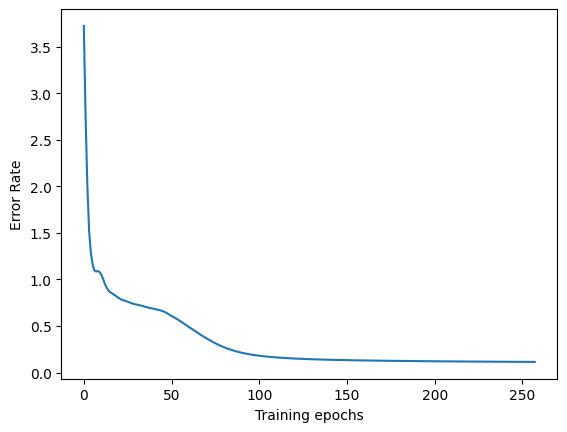

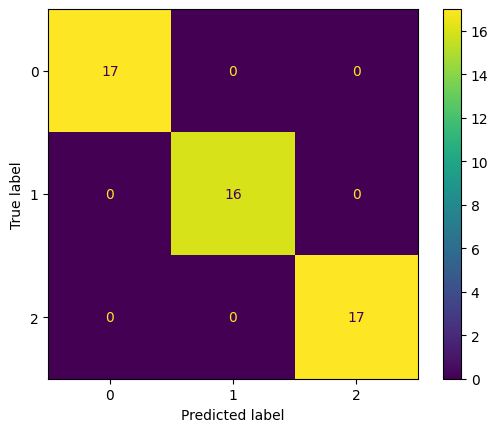

In [ ]:
# create an MLP object-  you will want to change the number of hidden nodes
irisMLP = MLPClassifier(
    hidden_layer_sizes=(5,),
    max_iter=1000,
    alpha=1e-4,
    solver="sgd",
    verbose=0,
    learning_rate_init=0.05,
)

# Fit the model to the data
irisMLP.fit(train_x, train_y)
print("number of output nodes = " + str(irisMLP.n_outputs_))

# Query the model for its training history and accuracy and display them
lossplot = plt.plot(irisMLP.loss_curve_)
plt.xlabel("Training epochs")
plt.ylabel("Error Rate")

# Report how well it does on the training set
training_accuracy = 100 * irisMLP.score(train_x, train_y)
print(f"Training set accuracy: {training_accuracy} %")


# Now how good is our network at predicting data it has never seen before
test_accuracy = 100 * irisMLP.score(test_x, test_y)
print(f"Estimated (Test set) accuracy: {test_accuracy}%")

#Plot the confusion matrix
predictions = irisMLP.predict(test_x)
confusion = ConfusionMatrixDisplay.from_predictions(np.argmax(test_y,axis=1), np.argmax(predictions, axis=1), display_labels=[0,1,2])

<div class= "alert alert-warning" style="color:black">
    <h2>Activity 2.3 Assessed: <br>
    Creating a test workflow to fairly assess three different supervised learning algorithms on a dataset</h2>
    <h3> 80 marks</h3>
    <h4> Task Description: </h4>
    <p> Complete the functions in the skeleton class (obeying any instructions in the method docstrings about types and names of variables) below to create a class with the following functionality listed below:
        <ol>
            <li> The <code>__init__</code> method should read in and store a set of input examples and labels<br>
            from two files whose names are provided at run-time <b>(10 marks)</b></li>
            <li> The <code>preprocess()</code> method should perform any preprocessing of the stored input examples needed to ensure the comparison between algorithms is fair.<b>(10 marks)</b></li>
            <li> The <code>make_label_encoders</code> method should check whether there are more than two labels present in <i>data_y</i>,<br>
    and if so make any different encodings of the labels needed for different classifiers.<b>(10 marks)</b></li>
            <li> The <code>run_comparison()</code> method should do a fair comparison of the classifier versions of k-Nearest Neighbour, DecisionTree and MultilayerPerceptron algorithms, and store the best accuracy for each.<br>
            <i>Fair</i> means doing hyper-parameter tuning for the combinations of values given below and storing each trained model.<b>(3 x 10 marks)</b><br>
            Models should be saved by appending to a list held as the value in a dictionary <code>self.stored_model</code>(see below for details).<br>You are encouraged to use the scikit-learn versions of all three algorithms as they have common interfaces which will make your coding easier.</li>
            <li> The best comparison result for each algorithm, and the location of the stored model, should be stored by creating and then adapting dictionaries called <br>
            <code>self.best_model_index:dict = {"kNN":0, "DecisionTree":0 and "MLP":0}</code> and <br>
             <code>self.best_accuracy:dict = {"kNN":0, "DecisionTree":0 and "MLP":0}</code> <b>(10 marks)</b>
</li>
    <li> The <code>report_best()</code> method should report the best performing model, in the format specified.<b>(10 marks)</b></li>
    </ol>
    <p> For the KNearestNeighbor algorithm you should try K values from the set {1,3,5,7,9}</p>
    <p> For DecisionTreeClassifer you should try every combination of <br>
    <i>max_depth</i> from the set {1,3,5} with<br>
    <i>min_split</i> from the set {2,5,10} and <br>
    <i> min_samples_leaf</i> from the set {1,5,10}.</p>
    <p> For MultiLayerPerceptron you should try every combination of <br>
    <i>first hidden layer width</i> from the set {2,5,10} with<br>
    <i>second hidden layer width</i> from the set {0,2,5} and<br>
    <i> activation</i> from the set {"logistic","relu"}.</p>
    <h4> How to begin?</h4>
    <p>This task builds heavily on  the code in this notebook, and that you wrote in worksheet 6 activity 4.
    So make sure you have completed that activity before attempting this task.</p>
    <h4> Things you must do so we can mark your code and provide feedback  automatically</h4>
    <ul> 
    <li> The examples and labels should be stored in arrays <code>data_x</code> and <code>data_y</code> </li>
    <li> The constructor should  create a dictionary to hold all the stored models<br> <code> self.stored_models:dict={"KNN":[],"DecisionTree":[],"MLP":[]}</code> </li>
    <li> As your code creates and fits models of different types they should be appended to the relevant list in the <i>stored_models</i> dictionary.<br>
        i.e., each different MLP model gets appended to the list <i>self.stored_models["MLP"]</i> after the call to <i>fit()</i></li> 
    <li>It probably makes sense to check and update the values held in <i>self.best_accuracy</i> and <i>self.best_model_index</i> as you test each model</li>
    <li> It is acceptable to do only one run of each algorithm-hyperparameter combination</li>
    <li> Any code that takes a <i>random_state</i> parameter should be given the value 12345</li>
    </ul>
    <div style="background:lightgreen"><h2> Don't over-think this!</h2><ul> 
        <li>You have most of the code snippets you need,</li>
        <li>and the hyper-parameter tuning is mostly a case of nested loops to run through combinations of values</li>
        <li> and from the search topic you should be used to keeping track of 'best-so-far' as you go through options</li></ul></div>
    <h4>Remember the marking system will not accept code cells if you have anything outside your class definition</h4>
    <h4> The point is that your code should work for different datasets - so don't hard code things about the data</h4> 
    </div>

In [ ]:
class MLComparisonWorkflow:
    """ class to implement a basic comparison of supervised learning algorithms on a dataset """ 
    
    def __init__(self,datafilename:str, labelfilename:str):
        """ Method to load the feature data and labels from files with given names,
        and store them  in arrays called data_x and data_y.
        
        You may assume that the features in the input examples are all continuous variables
        and that the labels are categorical, encoded by integers.
        The two files should have the same number of rows.
        Each row corresponding to the feature values and label
        for a specific training item.
        """
        
    
    def preprocess(self):
        """ Method to 
           - apply the preprocessing you think suitable to the data
           - separate it into train and test splits (using a 70:30 division)
           Remember to set random_state = 12345 if you ue train_test_split()
        """
        self.stored_models:dict={"KNN":[],"DecisionTree":[],"MLP":[]}
                                 
                                 
                                 
    def make_label_encodings(self):
        """ Method to make one-hot encodings if the data has more than two labels.
        Note you will probably need to keep the original label array for some algorithms"""
        pass
    
    def run_comparison(self):
        """ Method to perform a fair comparison of three supervised machoinbe learning algorithms.
        Should be extendable to include more algorithms later.
        
        For each of the algorithms KNearest Neighbour, DecisionTreeClassifer and MultiLayerPerceptron
        - Applies hyper-parameter tuning to find the best combination of relvant values for the algorithm
         -- creating and fitting model for each combination, 
            then storing it in the relevant list in a dictionary called self.stored_models
            which has the algorithm names as the keys and  lists of stored models as the values
         -- measuring the accuracy of each model on the test set
         -- keeping track of the best performing model for each algorithm, and its index in the relevant listso it can be retrieved.
        
        """
        pass
    
    def report_best(self) :
        """
        Method to analyse results.
        Returns
        -------
        accuracy (float) - the accurcy of the best performing model
        algorithm (str) - one of "KNN","DecisionTree" or "MLP"
        model (fitted model of relvant type)- the actual fitted model to be interrogated by marking code.
        """
        pass
        
        

In [ ]:
# run this cell to test your code before submission
#dump iris data to file
iris_x, iris_y = load_iris(return_X_y=True)
np.savetxt("irisx.csv", iris_x, delimiter=",")
np.savetxt("irisy.csv", iris_y, delimiter=",")

#run your code
mycomparison = MLComparisonWorkflow(datafilename="irisx.csv", labelfilename= "irisy.csv")

mycomparison.preprocess()

mycomparison.make_label_encodings()

mycomparison.run_comparison()

#sanity check- loop through stored models making sure there are the right number
assert len (mycomparison.stored_models["KNN"]) == 5,"wrong number of stored knn models"
assert len (mycomparison.stored_models["DecisionTree"]) == 27,"wrong number of stored DT models"
assert len (mycomparison.stored_models["MLP"]) == 18,"wrong number of stored MLP models"

# now print findings from the workflow
accuracy, algname, index = mycomparison.report_best()
print( f' Best test accuracy is {accuracy}, '
      f' created by the {algname} algorithm'
      f'with these hyper-parameters:'
     )
bestmodel =  mycomparison.stored_models[algname][index]
for key,val in model.__dict__.items():
    print(f'{key} : {val}')



<div class="alert alert-warning" style="color:black"><h1> Part 3: Learning to recognise hand-written digits:  MNIST</h1></div>





<div class = "alert alert-warning" style= "color:black"><h2>Activity 3.1: Loading and visualising the data</h2>
<ol>
    <li>Edit the first cell to give the right path depending on whether you are using csctcloud or your own installation</li>
    <li> Then run the second cell to visualise the data.</li>
    </ol>
</div>   

In [ ]:
#find directory holding data cepending on what machine you are on
import socket
if (socket.gethostname()=='csctcloud'): #on csctcloud
    datapath="/home/common/datasets"
else:  #you will need to change this if you are using data on your local machine
    datapath="/Users/j4-smith/GitHub/common/datasets/"


In [ ]:
### Only  Run this cell if you are using the ccstcloud server
# example code to run on the server using a copy of the data that I have already downloaded and made available.
# label is column 0
# pixel values are from 0-255 so need to be scaled to 0-1

import numpy as np

test = np.genfromtxt(datapath +"mnist/mnist_test.csv", delimiter=",")
X_test = test[1:, 1:785] / 255
y_test = test[1:, 0]

train = np.genfromtxt(datapath +"mnist/mnist_train.csv", delimiter=",")
X_train = train[1:, 1:785] / 255
y_train = train[1:, 0]

print(
    f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns, y_train has {y_train.shape} entries,\nX_test has shape {X_test.shape} y_test has {len(y_test)} entries."
)

This cell  shows us some example images

In [ ]:
# display ten random images from each class
print(
    f"The test data has {X_test.shape[0]} images, each described as a {X_test.shape[1]} features (pixel values)"
)


plt.figure(figsize=(10, 10))

for label in range(10):
    imagesForLabel = np.empty((0, 784))
    examples = 0
    next = 0
    while examples < 5:
        if int(y_test[next]) == int(label):
            imagesForLabel = np.vstack((imagesForLabel, X_test[next]))
            examples += 1
        next += 1
    for col in range(5):
        exampleplot = plt.subplot(10, 5, (label * 5 + col + 1))
        exampleplot.imshow(imagesForLabel[col].reshape(28, 28), cmap=plt.cm.gray)
plt.show()

<div class= "alert alert-warning" style = "color:black"> <h2>Activity 3.2 : Visualising what features the hidden layers learn to respond to.</h2> 
    <p>We will now configure a multilayer perceptron  and training it with all 60,000 images from the standard MNIST training set.</p>

<p>The idea for you to learn here, is that each hidden node is effectively acting as a feature detector. <br>
  <ol>
      <li> So let's consider just one hidden layer node: 
          <ul>
           <li> and a simple pattern where the weights from pixels in the top left and bottom right quadrant are all +1, </li>
            <li> and the weights from pixels in the top-right and bottom-left quadrants are all -1.</li>
          </ul> 
      </li>
      <li> Now consider an input image that has some constant value for every pixel (feature) - i.e. is all the same colour. 
          <ul>
             <li> When these inputs to the node  are multiplied by their weights and summed, they will cancel each other.</li>
             <li> So the <b> weighted sum </b> will be zero,</li>
            <li> and the <b>output</b> of the node  will be sigmoid(0) = 0.5, which we class as 0</li>
          </ul>
      </li>
     <li> Next consider an the image  of a simple 'chequer' pattern with  white (255) in the top-left and bottom-right quadrants,  
  and black (0)  in the other two.
         <ul>
          <li>In this case  the pattern of  pixel intensities (features) in the image  maches match the pattern in the weights.</li>
             <li>So then the weighted sum will be at its maximum, and the <b>node will output +1.<b></li>
         </ul>
             </ol>
         <p>So we can consider our hidden node is acting as a 'feature detector' for the checker pattern.<br>
             And in general <b>each</b> hidden node is a feature detector that  <b>learns</b> to recognise useful patterns during training.<br>
             And hidden nodes in the 2nd,3rd,...nth layers build complex features out of those recognised by the layer before.</p>
<p>
  <b>Run</b> the next set of cells to:<ul>
<li> Set up and train the network with 16 nodes (a number chosen so we can visualise them neatly in a grid). </li>
         <li> Then output the pattern  weights from each of the nodes as an image.</li></ul>
      </p></div>

<div class="alert alert-block alert-info"> In year 2, the Machine Learning module will explain how this concept of feature detectors has been extended  in Deep Convolutional Networks. <br>
In these features (called 'filters') can be a smaller size than the image and a process of Convolution (rather than straighforward multiplying) lets them detect small local features anywhere in the image.<br>  Convolutional Neural Networks have completely revolutionised the field of image processing and AI for visual tasks.</div>


In [ ]:
# Set up and train network
import warnings
from sklearn.exceptions import ConvergenceWarning

numHiddenNodes = 16
mlp = MLPClassifier(hidden_layer_sizes=(numHiddenNodes), early_stopping=True, verbose=1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print(f"Training set accuracy: {100*mlp.score(X_train, y_train)}%")
print(f"Test set accuracy: {100*mlp.score(X_test, y_test)}%")

## Run the next cell to  visualise what the hidden nodes are responding to - you don't need to go through the code 

In [ ]:
# get the weights from the input nodes to the first hidden layer
coef = mlp.coefs_.copy()[0].T

print(coef[0].max(), coef[0].min())

# find endpoints to use for scaling colour range
scalemax = coef.max()  # *0.75
scalemin = coef.min()  # *0.75

plt.figure(figsize=(10, 10))
numRows = 4
numCols = 5

for i in range(numHiddenNodes):
    l1_plot = plt.subplot(numRows, numCols, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28), cmap=plt.cm.seismic, vmin=scalemin, vmax=scalemax
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    # l1_plot.set_xlabel('Hidden Node %i' % i)
title = "Learned weights from pixels to each hidden node which correspond to patterns the nodes have been trained to respond to.\n"
title = (
    title
    + "Looking at a hidden node:\n    Parts of the image where a node has weights coloured white (0.0) are ignored.\n"
)
title = (
    title
    + "    Blue [red] indicates negative [positive] weights: signals from these pixels suppress [stimulate] the node.\n"
)
title = (
    title
    + "    so a sensitive (red) areas might have a blue border to mark whereit must have an edge"
)
title = (
    title
    + "\n    Remember that each node could have positive or negative effect on each output node"
)

_ = plt.suptitle(title, x=0.15, horizontalalignment="left")

<div class = "alert alert-warning" style="color:black"><h2> Activity 3.3: Discussion / Thought exercises </h2>
Iris is a simple problems with only 4 features and three classes.

MNIST is a much more complicated problem with 784 features and ten classes - some of which (e.g. 4s and sevens) can be drawn in completely different ways.
<p>
    <b>Questions:</b><ol>
    <li>So how come the accuracy is roughly the same on these two problems?</li>
    <li> The MNIST MLP you just trained and visualised has 10 nodes in its output layer, each receving numHiddenNodes (16) input signals. <br>
        This means the hidden layer is effectively learning to  reducing a 784-Dimensional problems to a 16-dimensional one!<br>
        How cool is that?<br>
        From your observations of the visualisations, does it look like we even need 16 hidden nodes / dimensions/features?</li>
    </ol></p>
    </div>

<div class = "alert alert-warning" style="color:black"> <h2>Activity 3.4: examining the effect of having less data.</h2>
<p>The code in the cell below has a loop which trains a newtwork with different amounts of training data, and reports the training and test accuracy for each run. </p>
<p>  Run the cell below and make note of the train and test accuracy for each different sized training data.</p>
 <h4>   Make a hypothesis that explains the  patterns of changing training and test scores you see, and be ready to discuss this in class.</h4></div>

In [ ]:
for trSetSize in (100, 600, 1000, 6000, 10000, 50000):
    split = trSetSize / 60000
    _, X_train_small, _, y_train_small = train_test_split(
        X_train, y_train, test_size=split, stratify=y_train
    )
    smallMnistMLP = MLPClassifier(
        hidden_layer_sizes=(16),
        max_iter=25,
        alpha=1e-4,
        solver="sgd",
        verbose=0,
        random_state=10,
        learning_rate_init=0.1,
    )

    # put a loop of n runs here

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        smallMnistMLP.fit(X_train_small, y_train_small)
    print(f"With a training set of {trSetSize} examples")
    print(
        f"    Training set accuracy: {100*smallMnistMLP.score(X_train_small, y_train_small)}%"
    )
    print(f"    Test set accuracy: {100*smallMnistMLP.score(X_test, y_test)}%")

<div class = "alert alert-warning" style="color:black"><h2> (Stretch) Activity 3.5: Gathering evidence for your hypothesis.</h2>
<ol>
    <li> Copy and paste the code from the previous cell into the cell below. </li>
    <li> <b>Edit</b> the code by: <ul>
        <li> Adding an array called results with 4 columns and 30 rows, initialised to zero (hint: np,zeros). </li>
        <li> Adding a loop so that it runs the experiment for each training set size  5 times.</li>
        <li> saving the training and test accuracy from each run into a seperate row in your new  array.</li>
        <li> Store the training set size in results column 0, run number in column 1, training accuracy in column 2 and test accuracy in column 3.</li>
     </ul>
    <li> Use matplotlib to make a plot with training set size on the x-axis and accuracy on the y-axis</li>
        <li> Plot your results as two different lines on your plot, with error bars for each.</li>
        </ol>
        <p> <b>  HINT: google is good to find code snippets to make plots with.</b></p.</div>
        

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>